In [1]:
# resources:
# https://ml-explained.com/blog/principal-component-analysis-explained  - useful to start
# https://builtin.com/data-science/step-step-explanation-principal-component-analysis  - used to verify some stuff
# https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/  - used to verify more (also had pseudocode)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(64)
n_rows = 50
seq = np.random.random_integers(1, 64, n_rows) ** 1/np.random.random_integers(2, 9, n_rows)
data = np.array([seq,
        np.sin(seq),
        np.tanh(seq) + np.random.random_sample(size=n_rows),
        seq**(1/1.9)]).T

/var/folders/51/6b4306h90693z7j7cd0g40kr0000gn/T/ipykernel_32466/3353493774.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 64 + 1) instead
  seq = np.random.random_integers(1, 64, n_rows) ** 1/np.random.random_integers(2, 9, n_rows)
/var/folders/51/6b4306h90693z7j7cd0g40kr0000gn/T/ipykernel_32466/3353493774.py:3: DeprecationWarning: This function is deprecated. Please call randint(2, 9 + 1) instead
  seq = np.random.random_integers(1, 64, n_rows) ** 1/np.random.random_integers(2, 9, n_rows)


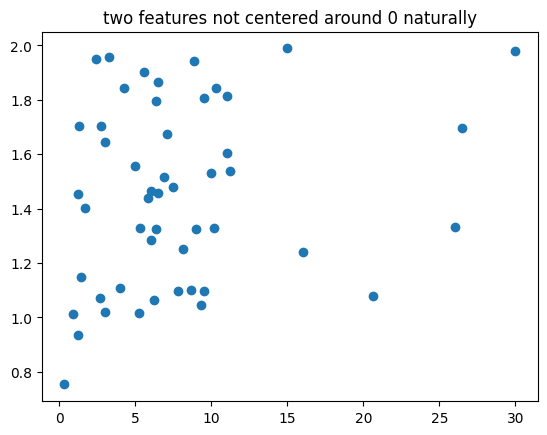

In [4]:
plt.scatter(data[:, 0], data[:, 2])
plt.title('two features not centered around 0 naturally')
plt.show()

In [28]:
# transform each column to have a zero mean 
# some resources said to standardize it, but the one from ML mastery didn't
zero = (data - data.mean(axis=0))  # / data.std(axis=0)

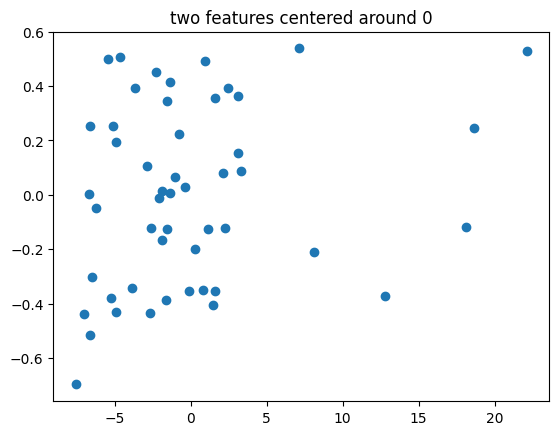

In [29]:
plt.scatter(zero[:,0], zero[:,2])
plt.title('two features centered around 0')
plt.show()

In [30]:
# compute covariance matrix between columns
covmat = np.cov(zero, rowvar=False)

In [31]:
# compute eigenvalues and eigenvectors of the covariance matrix
eigenvals, eigenvecs = np.linalg.eig(covmat)
# eigenvals = all_eig.eigenvalues
# eigenvecs = all_eig.eigenvectors

# sort eigenvalues and put in dict w corresponding eigenvectors
# python dicts are ordered after python 3.6+ so we should be good here i believe
sorted_ev = sorted(eigenvals, reverse=True)  # make sure to sort in descending order
eigendict = {}
for val in sorted_ev:  # not the most elegant solution... 
    eigendict[val] = eigenvecs[:,list(eigenvals).index(val)]  # ...but it gets the job done

In [32]:
eigenvecs  # columns correspond to eigenvectors

array([[ 0.98448607, -0.04156388,  0.16421496, -0.0457501 ],
       [-0.01046639, -0.97742761, -0.14087997,  0.15709412],
       [ 0.01094291,  0.12121865,  0.23382247,  0.9646312 ],
       [ 0.17480815,  0.16796951, -0.94789943,  0.20667613]])

In [33]:
eigendict  # ordered dict of eigenvals/eigenvecs

{np.float64(43.1914909736901): array([ 0.98448607, -0.01046639,  0.01094291,  0.17480815]),
 np.float64(0.48673647739533954): array([-0.04156388, -0.97742761,  0.12121865,  0.16796951]),
 np.float64(0.10126862566825974): array([-0.0457501 ,  0.15709412,  0.9646312 ,  0.20667613]),
 np.float64(0.06532388637659262): array([ 0.16421496, -0.14087997,  0.23382247, -0.94789943])}

In [34]:
# display the percentage of variance captured by each principal component
[float(round(x/sum(eigenvals) * 100, 1)) for x in sorted_ev]

[98.5, 1.1, 0.2, 0.1]

In [35]:
# select some number of principal components (we'll do 3)
# named W to agree with the literature
# this matrix is used to reduce the number of features
n_comps = 3
W = np.array(list(eigendict.values())[0:n_comps])
W  # this is already the transpose bc in the process of converting to/from a dict we essentially
# transformed the column vectors (eigenvectors) into row vectors
# according to the np.linalg.eig docs each column of the return value is an eigenvector

array([[ 0.98448607, -0.01046639,  0.01094291,  0.17480815],
       [-0.04156388, -0.97742761,  0.12121865,  0.16796951],
       [-0.0457501 ,  0.15709412,  0.9646312 ,  0.20667613]])

In [36]:
transformed = W.dot(zero.T).T
transformed.shape  # has one fewer dimension than zero.shape (transformed data)

(50, 3)

In [37]:
zero.shape  # we have successfully transformed the data!

(50, 4)